# Task - 3

## 1. Basic Pandas Operations

In [2]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the dataset and display the head. You will get the output as mentioned below

df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [4]:
# Check the shape of the dataframe

df.shape

(10000, 15)

In [5]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## 2. Cleaning the Data

In [6]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

df['Health Indicator'].fillna(df['Health Indicator'].mode()[0],axis=0,inplace=True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0],axis=0,inplace=True)
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0],axis=0,inplace=True)

In [7]:
# Check again Holding_Policy_Duration is in object column convert that into int

df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].apply(lambda x: str(15) if x=='14+' else x)
df['Holding_Policy_Duration']=pd.to_numeric(df['Holding_Policy_Duration'])
df['Holding_Policy_Duration'].dtype

dtype('int64')

In [8]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


df[['Accomodation_Type','Reco_Insurance_Type','Is_Spouse']].nunique()

Accomodation_Type      2
Reco_Insurance_Type    2
Is_Spouse              2
dtype: int64

In [9]:
# Converting all the Yes to 1 and No to 0. 
# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


df['Accomodation_Type']=df['Accomodation_Type'].apply(lambda x:1 if x=='Owned' else 0)
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].apply(lambda x:1 if x=='Individual' else 0)
df['Is_Spouse']=df['Is_Spouse'].apply(lambda x:1 if x=='Yes' else 0)

In [10]:
# Now again having a look at all those columns to see if everything went well

# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int64  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [11]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df[['City_Code','Health Indicator']].nunique()

City_Code           36
Health Indicator     9
dtype: int64

In [12]:
# Lets just try to see what is happening Response. Check the output.

df['Response']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Response, Length: 10000, dtype: int64

In [13]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape


df.drop('Unnamed: 0',axis=1,inplace=True)

df.shape

(10000, 14)

In [14]:
# Getting all the Object Dtypes

df.select_dtypes(include='object').columns

Index(['City_Code', 'Health Indicator'], dtype='object')

In [15]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

from sklearn.preprocessing import OneHotEncoder

OHE=OneHotEncoder(handle_unknown='ignore')
one_hot_encoded=OHE.fit_transform(df[['Health Indicator']])

df_encoded=pd.DataFrame(one_hot_encoded.toarray(),columns=sorted(df['Health Indicator'].unique().tolist()))

In [16]:
# Concatinating the original data frame and onehot encoded dataframe

final_df=df.join(df_encoded)

In [17]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe


final_df.drop(['ID','Health Indicator','X9'],axis=1,inplace=True)

In [18]:
final_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,X1,X2,X3,X4,X5,X6,X7,X8
0,C3,64,1,1,36,36,0,15,2.0,16,13320.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C3,2955,1,1,66,66,0,10,1.0,19,16152.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,C1,1542,0,1,24,24,0,3,1.0,16,7310.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C26,772,0,1,75,75,0,1,3.0,16,15792.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C2,1510,1,0,59,58,1,15,4.0,17,23673.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C3,13,1,0,47,40,1,15,3.0,19,27840.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,C5,1477,0,1,34,34,0,6,1.0,4,10560.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,C1,2357,1,1,64,64,0,8,2.0,19,14716.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,C1,1443,0,1,53,53,0,15,3.0,13,11664.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Perform Exploratory Data Analysis

**To Do:**
1. Perform Univaraite Analysis (Basic pandas statistical description)
2. Perform Bivaraite Analysis (Pandas Cross Tabs)
3. Visualisations - 
    * Univariate - Histograms, boxplot, PDFs, countplot, etc
    * Bivariate - Scatterplot, Boxplots, Pairplot, etc
4. Write proper observations after each plot
5. At the end of the notebook, summarize it with all the best observations you got.

### City Code
#### Lets see the number of cities and see how many customers are there

In [19]:
print('no of cities in the dataframe : ',final_df['City_Code'].nunique())
print()
final_df['City_Code'].value_counts()

no of cities in the dataframe :  36



C1     1796
C2     1505
C3      966
C4      727
C9      428
C7      390
C8      371
C6      361
C10     335
C5      264
C15     239
C11     231
C16     219
C17     211
C13     193
C20     179
C12     168
C19     168
C14     153
C21     136
C24     129
C18     127
C23     123
C22     102
C26      89
C29      71
C25      66
C27      57
C33      54
C28      47
C32      39
C34      25
C36      12
C30      12
C31       4
C35       3
Name: City_Code, dtype: int64

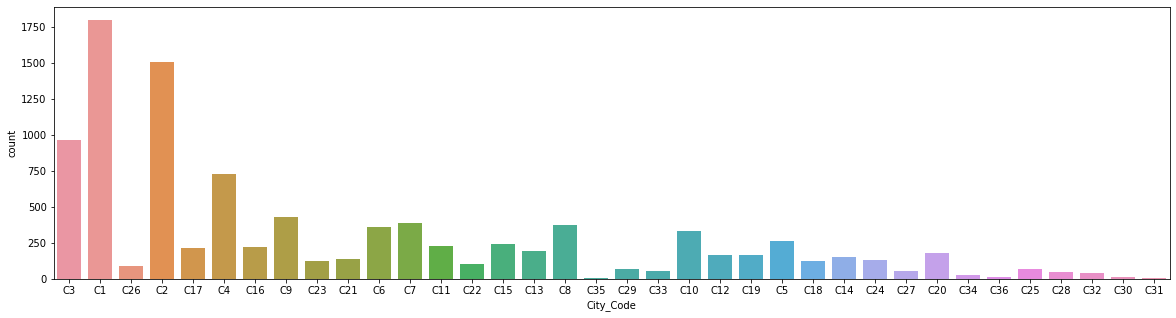

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['City_Code'])
plt.show()

#### Let's see city-wise customers interests in recommended policy

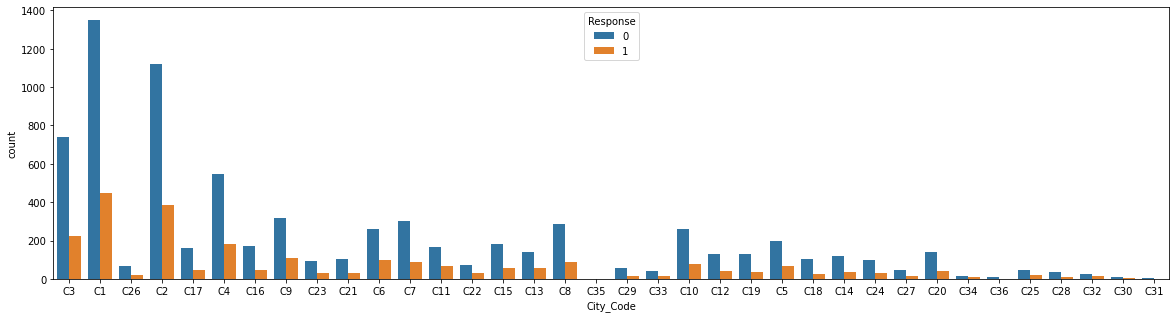

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['City_Code'],hue=final_df['Response'])
plt.show()

### Region Code
#### Let's see the number of regions and region-wise customer interests in recommended policy.

In [22]:
print('no of Regions in the dataframe : ',final_df['Region_Code'].nunique())
print()
final_df['Region_Code'].value_counts()

no of Regions in the dataframe :  3726



1       23
6       18
4       18
7       17
30      15
        ..
3233     1
2765     1
2151     1
5170     1
714      1
Name: Region_Code, Length: 3726, dtype: int64

### Accomodation Type
#### Let's see how many customers are living in their own house or rented houseand see how their interests vary in recommended policy.

In [23]:
final_df['Accomodation_Type'].value_counts()   # here 1 means Owned house and 0 means Rented House

1    5509
0    4491
Name: Accomodation_Type, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

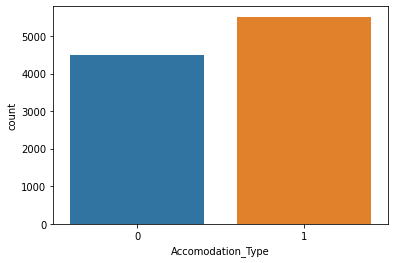

In [24]:
sns.countplot(final_df['Accomodation_Type'])

In [25]:
pd.crosstab(final_df['Accomodation_Type'],final_df['Response'])

Response,0,1
Accomodation_Type,,
0,3423,1068
1,4118,1391


<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

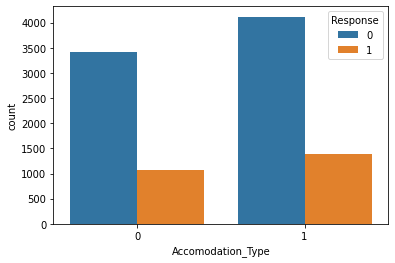

In [26]:
sns.countplot(final_df['Accomodation_Type'],hue=final_df['Response'])

#### Let's see the city-wise accomodation type and customer response

In [27]:
pd.crosstab(final_df['Response'],columns=[final_df['City_Code'],final_df['Accomodation_Type']]).T

Response                       0    1
City_Code Accomodation_Type          
C1        0                  442  141
          1                  908  305
C10       0                  151   48
          1                  107   29
C11       0                   81   31
...                          ...  ...
C7        1                  214   66
C8        0                  138   45
          1                  147   41
C9        0                  162   55
          1                  156   55

[72 rows x 2 columns]

<AxesSubplot:xlabel='City_Code,Accomodation_Type'>

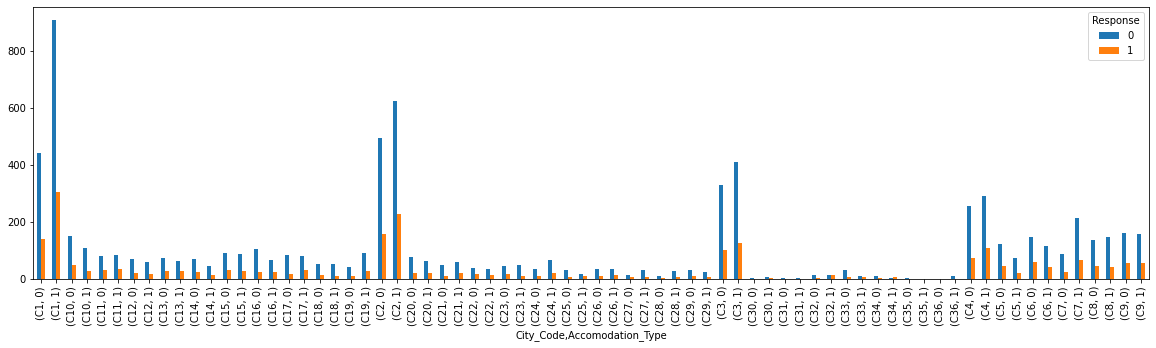

In [28]:
pd.crosstab(final_df['Response'],columns=[final_df['City_Code'],final_df['Accomodation_Type']]).T.plot(kind='bar',figsize=(20,5))

### Reco Insurance Type
#### Let's see the various recommended insurance types and customer response to them.

In [29]:
pd.crosstab(final_df['Reco_Insurance_Type'],final_df['Response'])

Response,0,1
Reco_Insurance_Type,,
0,1509,535
1,6032,1924


<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

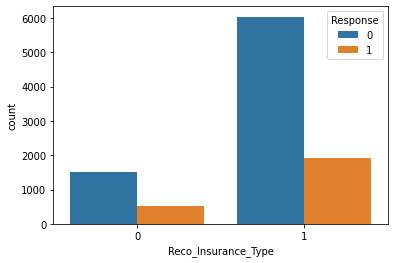

In [30]:
sns.countplot(final_df['Reco_Insurance_Type'],hue=final_df['Response'])

#### Let's see customers accommodation, recommended insurance type and customer responses.

In [31]:
pd.crosstab(index=[final_df['Accomodation_Type'],final_df['Reco_Insurance_Type']],columns=final_df['Response'])

Response                                  0    1
Accomodation_Type Reco_Insurance_Type           
0                 0                     380  139
                  1                    3043  929
1                 0                    1129  396
                  1                    2989  995

<AxesSubplot:xlabel='Accomodation_Type,Reco_Insurance_Type'>

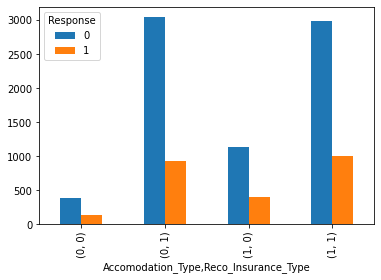

In [32]:
pd.crosstab(index=[final_df['Accomodation_Type'],final_df['Reco_Insurance_Type']],columns=final_df['Response']).plot(kind='bar')

### Recommended Policy Category
#### Let's see how many categories under the type of recommended policies.

In [33]:
print('Number of Recommended Policy Categories : ',final_df['Reco_Policy_Cat'].nunique())

Number of Recommended Policy Categories :  22


In [34]:
final_df['Reco_Policy_Cat'].unique()

array([16, 19, 17, 21,  9, 18, 13, 15, 14, 22, 20,  5, 12,  6,  4,  1,  3,
       11,  8,  2,  7, 10], dtype=int64)

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

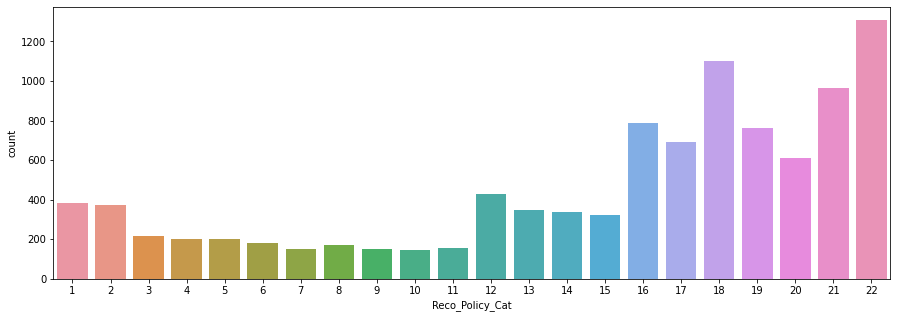

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(final_df['Reco_Policy_Cat'])

### Recommended Policy Premium
#### Let's see if there is a relationship between the recommended policy premium and recommended policy category.Analyse results with customer's holding policy type and their response to recommended policy.

In [36]:
avg_premium=final_df.groupby(final_df['Reco_Policy_Cat'])[['Reco_Policy_Premium']].mean()
avg_premium

,Reco_Policy_Premium
Reco_Policy_Cat,
1,12915.944357
2,13231.982306
3,15390.644240
4,12157.566000
5,16142.542157
6,13193.164444
7,15231.881046
8,14319.471765
9,13699.385333


<AxesSubplot:xlabel='Reco_Policy_Cat'>

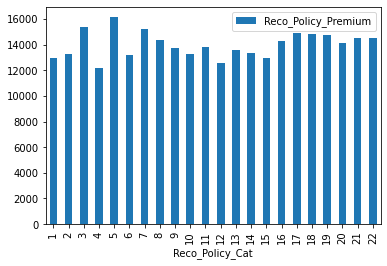

In [37]:
avg_premium.plot(kind='bar')

Text(0, 0.5, 'Average Recommended plocy premium')

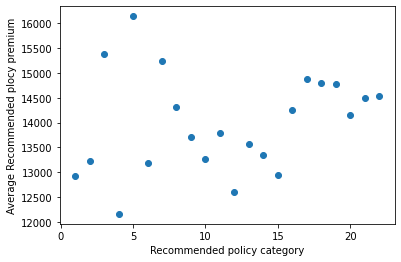

In [38]:
plt.scatter(avg_premium.index,avg_premium.values)
plt.xlabel('Recommended policy category')
plt.ylabel('Average Recommended plocy premium')

<AxesSubplot:xlabel='Reco_Policy_Cat'>

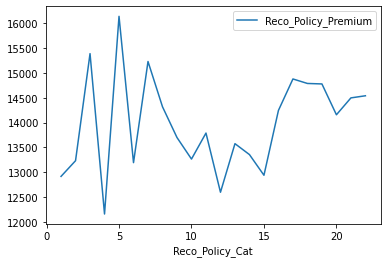

In [39]:
avg_premium.plot(kind='line')

In [40]:
pd.crosstab(final_df['Holding_Policy_Type'],final_df['Response'])

Response,0,1
Holding_Policy_Type,,
1.0,1212,390
2.0,730,243
3.0,5037,1590
4.0,562,236


<AxesSubplot:xlabel='Holding_Policy_Type'>

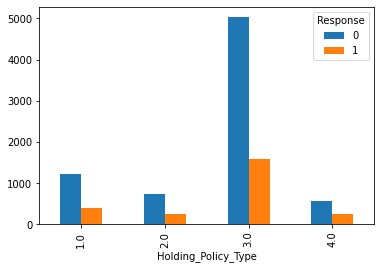

In [41]:
pd.crosstab(final_df['Holding_Policy_Type'],final_df['Response']).plot(kind='bar')

#### Let's see which type of recommnded policy has more number of customers

In [42]:
final_df['Reco_Policy_Cat'].value_counts()

22    1308
18    1102
21     966
16     786
19     764
17     694
20     612
12     431
1      381
2      373
13     348
14     336
15     323
3      217
5      204
4      200
6      180
8      170
11     155
7      153
9      150
10     147
Name: Reco_Policy_Cat, dtype: int64

In [43]:
print('Recommended policy category {} has more number of customers with {}'.format(final_df['Reco_Policy_Cat'].value_counts().idxmax(),final_df['Reco_Policy_Cat'].value_counts().max()))

Recommended policy category 22 has more number of customers with 1308


In [44]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Response'])

Response,0,1
Reco_Policy_Cat,,
1,378,3
2,324,49
3,173,44
4,182,18
5,150,54
6,154,26
7,123,30
8,137,33
9,123,27


<AxesSubplot:xlabel='Reco_Policy_Cat'>

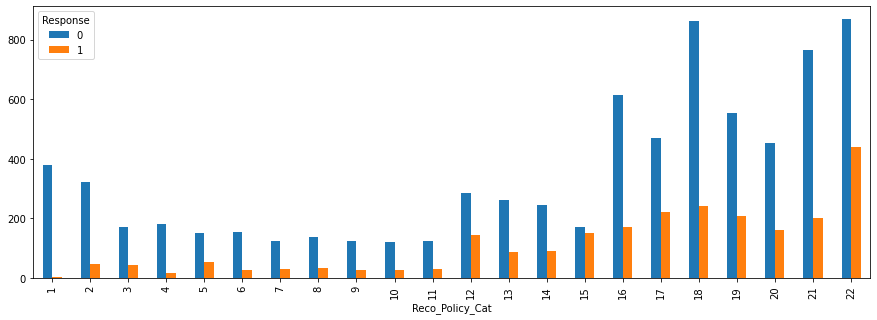

In [45]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Response']).plot(kind='bar',figsize=(15,5))

#### Let's see city-wise recommended insurance types to customers and theirresponses to recommended policy.

In [46]:
pd.crosstab(index=[final_df['City_Code'],final_df['Reco_Insurance_Type']],columns=final_df['Response'])

Response                         0    1
City_Code Reco_Insurance_Type          
C1        0                    354  116
          1                    996  330
C10       0                     37   25
          1                    221   52
C11       0                     39   12
...                            ...  ...
C7        1                    220   60
C8        0                     60   12
          1                    225   74
C9        0                     52   21
          1                    266   89

[71 rows x 2 columns]

<AxesSubplot:xlabel='City_Code,Reco_Insurance_Type'>

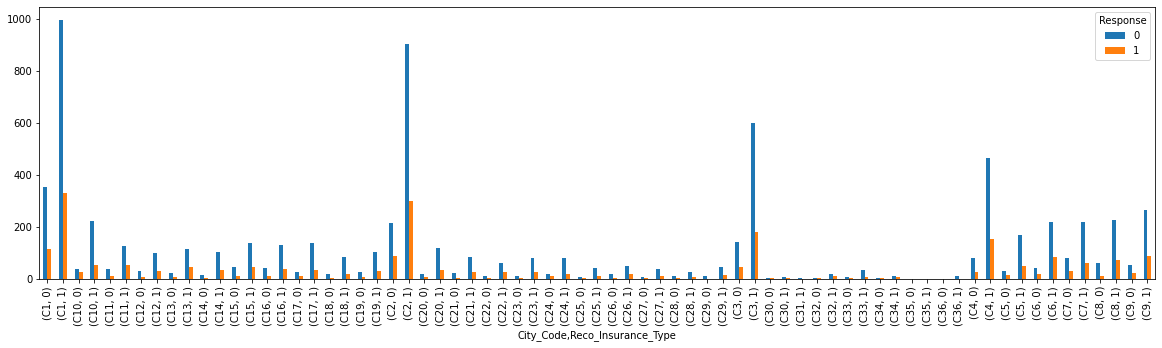

In [47]:
pd.crosstab(columns=final_df['Response'],index=[final_df['City_Code'],final_df['Reco_Insurance_Type']]).plot(kind='bar',figsize=(20,5))

#### Let's analyze the customer's upper age with their type of accommodation and recommended policy types to them and also their interest in the recommended policy.


In [48]:
pd.crosstab(final_df['Accomodation_Type'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Accomodation_Type,,,,,,,,,,,,,,,,,,,,,
0,24,101,129,221,240,247,252,240,201,173,...,32,24,26,23,28,16,25,17,15,109
1,5,12,21,31,56,59,64,70,88,79,...,106,109,80,97,106,102,74,85,70,441


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

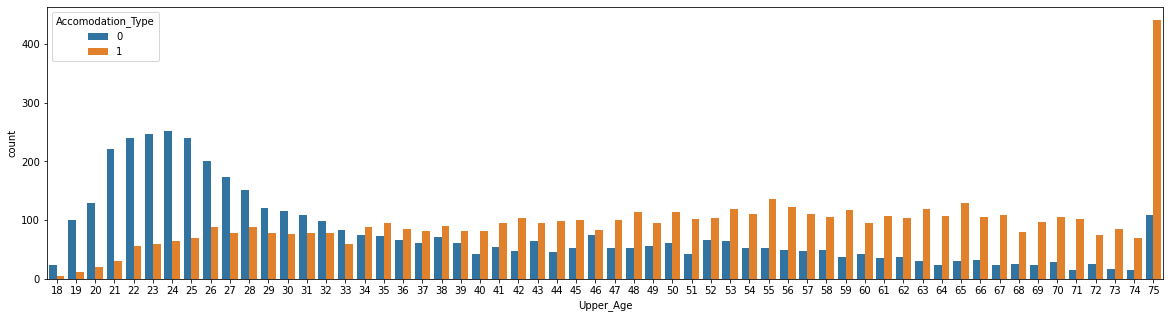

In [49]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['Upper_Age'],hue=final_df['Accomodation_Type'])

In [50]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Reco_Policy_Cat,,,,,,,,,,,,,,,,,,,,,
1,0,2,7,8,10,16,12,9,6,14,...,2,4,1,2,4,2,2,3,2,18
2,8,5,5,9,11,16,11,9,10,6,...,3,1,1,2,6,1,3,1,1,16
3,0,0,4,5,5,9,4,8,2,4,...,1,5,3,5,0,0,4,1,7,14
4,0,2,3,10,12,5,9,10,8,2,...,2,1,2,3,1,1,0,2,1,4
5,0,2,0,1,1,5,6,7,3,8,...,3,4,4,5,5,7,0,5,3,21
6,0,6,5,9,6,6,8,3,4,2,...,0,1,1,1,0,4,0,2,1,8
7,0,2,0,1,6,5,3,3,5,2,...,5,7,2,1,1,2,4,3,6,12
8,0,0,5,3,9,8,4,5,5,3,...,4,2,4,2,3,4,0,0,2,10
9,0,0,3,4,5,5,6,4,4,7,...,2,1,1,2,1,0,2,1,1,4


In [51]:
pd.crosstab(final_df['Response'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Response,,,,,,,,,,,,,,,,,,,,,
0,24,91,116,192,232,240,243,230,217,189,...,96,103,80,82,97,88,81,73,74,413
1,5,22,34,60,64,66,73,80,72,63,...,42,30,26,38,37,30,18,29,11,137


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

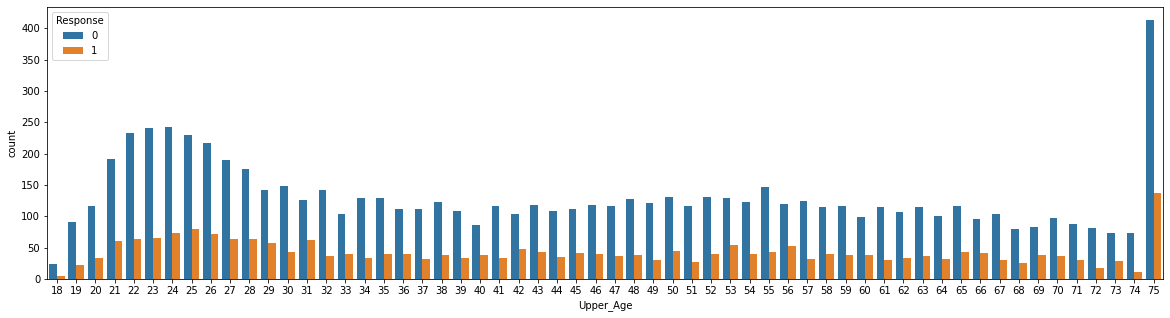

In [52]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['Upper_Age'],hue=final_df['Response'])

#### Let's see city-wise the customers who have recommended to take the joint policy with their spouse or with other customers. Check these results with the customer's type of accommodation.

In [53]:
final_df[final_df['Reco_Insurance_Type']==0]['City_Code'].value_counts()

C1     470
C2     301
C3     189
C4     110
C7     110
C9      73
C8      72
C10     62
C6      58
C15     56
C16     51
C11     51
C5      45
C17     38
C12     36
C19     35
C13     30
C24     29
C20     27
C21     24
C18     24
C26     22
C14     18
C23     17
C22     16
C28     15
C25     12
C33     11
C29     11
C27      9
C32      9
C34      7
C30      4
C36      1
C35      1
Name: City_Code, dtype: int64

In [54]:
pd.crosstab(final_df[final_df['Reco_Insurance_Type']==0]['Response'],final_df[final_df['Reco_Insurance_Type']==0]['City_Code'])

City_Code,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
Response,,,,,,,,,,,,,,,,,,,,,
0,354,37,39,29,22,15,44,40,26,19,...,7,4,1,0,82,30,41,81,60,52
1,116,25,12,7,8,3,12,11,12,5,...,4,3,0,1,28,15,17,29,12,21


<AxesSubplot:xlabel='City_Code'>

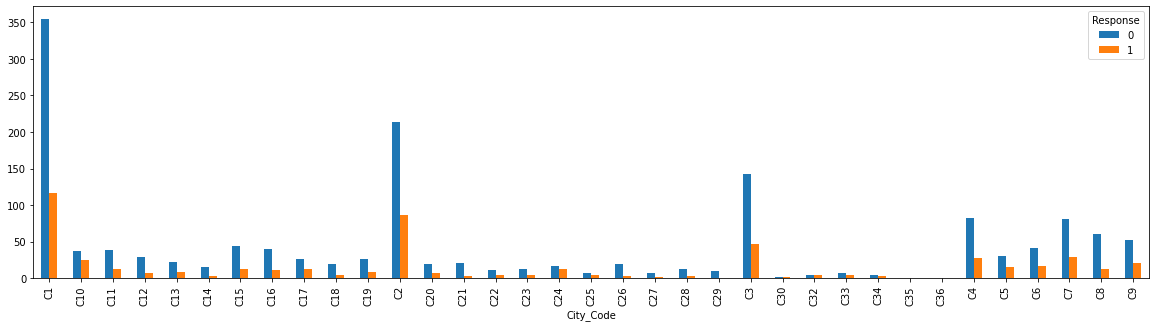

In [55]:
pd.crosstab(final_df[final_df['Reco_Insurance_Type']==0]['City_Code'],
            final_df[final_df['Reco_Insurance_Type']==0]['Response']).plot(kind='bar',figsize=(20,5))

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [56]:
final_df['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [57]:
from imblearn.under_sampling import RandomUnderSampler

In [58]:
sampler=RandomUnderSampler()

In [59]:
X=final_df.drop('Response',axis=1)
y=final_df['Response']

In [60]:
print(X.shape,y.shape)

(10000, 19) (10000,)


In [61]:
predictor,response=sampler.fit_resample(X,y)

In [62]:
print(predictor.shape,response.shape) 

(4918, 19) (4918,)


## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [63]:
predictor.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,X1,X2,X3,X4,X5,X6,X7,X8
0,C21,5173,1,1,73,73,0,15,3.0,22,18240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,C1,1436,1,1,75,75,0,6,2.0,17,19590.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,C2,1656,0,1,22,22,0,1,3.0,11,8736.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C1,1084,1,1,71,71,0,15,3.0,22,17610.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,C11,1559,0,1,60,60,0,15,3.0,17,14040.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
predictor['Holding_Policy_Type']=predictor['Holding_Policy_Type'].astype('category')
predictor['Reco_Policy_Cat']=predictor['Reco_Policy_Cat'].astype('category')

In [65]:
predictor=pd.concat([predictor,pd.get_dummies(predictor[['City_Code','Holding_Policy_Type','Reco_Policy_Cat']],drop_first=True)],axis=1)

In [66]:
predictor.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,C21,5173,1,1,73,73,0,15,3.0,22,...,0,0,0,0,0,0,0,0,0,1
1,C1,1436,1,1,75,75,0,6,2.0,17,...,0,0,0,0,1,0,0,0,0,0
2,C2,1656,0,1,22,22,0,1,3.0,11,...,0,0,0,0,0,0,0,0,0,0
3,C1,1084,1,1,71,71,0,15,3.0,22,...,0,0,0,0,0,0,0,0,0,1
4,C11,1559,0,1,60,60,0,15,3.0,17,...,0,0,0,0,1,0,0,0,0,0


In [67]:
predictor.drop(['City_Code','Region_Code','Holding_Policy_Type','Reco_Policy_Cat'],axis=1,inplace=True)

In [68]:
predictor.shape

(4918, 74)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler=StandardScaler()

In [71]:
predictor['Upper_Age']=scaler.fit_transform(predictor[['Upper_Age']])
predictor['Lower_Age']=scaler.fit_transform(predictor[['Lower_Age']])
predictor['Holding_Policy_Duration']=scaler.fit_transform(predictor[['Holding_Policy_Duration']])
predictor['Reco_Policy_Premium']=scaler.fit_transform(predictor[['Reco_Policy_Premium']])

In [72]:
predictor

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,1,1,1.629301,1.752505,0,0.909482,0.620342,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1.744895,1.868158,0,-0.680827,0.826979,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,-1.318361,-1.196650,0,-1.564333,-0.834381,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1.513706,1.636851,0,0.909482,0.523912,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0.877936,1.000759,0,0.909482,-0.022528,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,1,1,1.398112,1.521198,0,0.732781,1.341275,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4914,1,1,-0.624794,-0.502731,0,-0.857528,-0.420495,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4915,0,1,-1.260564,-1.138823,0,0.909482,-1.600315,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4916,0,1,0.242166,0.364667,0,-0.504126,-0.066611,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(predictor,response,test_size=0.2)

In [81]:
print(y_train.shape,y_test.shape)

(3934,) (984,)


## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=10000)

In [83]:
LR_model.fit(x_train,y_train)
print('Training Accuracy : ',LR_model.score(x_train,y_train))

Training Accuracy :  0.6054905948144382


In [84]:
y_pred=LR_model.predict(x_test)
print('Testing Accuracy : ',LR_model.score(x_test,y_test))

Testing Accuracy :  0.5660569105691057


In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [86]:
confusion_matrix(y_test,y_pred)

array([[292, 185],
       [242, 265]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       477
           1       0.59      0.52      0.55       507

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.5660569105691057
Precission :  0.5888888888888889
Recall :  0.5226824457593688
f1-score :  0.5538140020898642
Roc Auc score :  0.567420887449915


In [88]:
y_pred_proba = LR_model.predict_proba(x_test)[:,1]

In [89]:
from sklearn.metrics import roc_curve,auc
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.609318596256187


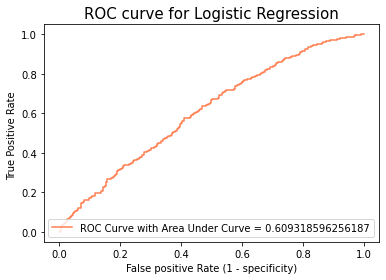

In [90]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [92]:
performance_metrics_with_default_parameters = pd.DataFrame(index=['Accuracy Score','Precision','Recall','F1 Score','AUC'])

In [93]:
performance_metrics_with_default_parameters['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

In [94]:
performance_metrics_with_default_parameters

,Logistic Regression
Accuracy Score,0.566057
Precision,0.588889
Recall,0.522682
F1 Score,0.553814
AUC,0.609319


# SVM

In [95]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)

In [96]:
svm_model.fit(x_train,y_train)
print('Training Accuracy : ',svm_model.score(x_train,y_train))

Training Accuracy :  0.6814946619217082


In [97]:
y_pred=svm_model.predict(x_test)
print('Testing Accuracy : ',svm_model.score(x_test,y_test))

Testing Accuracy :  0.5772357723577236


In [98]:
confusion_matrix(y_test,y_pred)

array([[280, 197],
       [219, 288]], dtype=int64)

In [99]:
y_pred_proba = svm_model.predict_proba(x_test)[:,1]

In [100]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6069037665554357


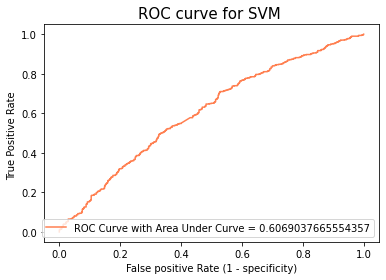

In [101]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [102]:
performance_metrics_with_default_parameters['SVM']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN 

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [104]:
knn_model.fit(x_train,y_train)
print('Training Accuracy : ',knn_model.score(x_train,y_train))

Training Accuracy :  0.7186070157600407


In [105]:
y_pred=knn_model.predict(x_test)
print('Testing Accuracy : ',knn_model.score(x_test,y_test))

Testing Accuracy :  0.5193089430894309


In [106]:
confusion_matrix(y_test,y_pred)

array([[246, 231],
       [242, 265]], dtype=int64)

In [107]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       477
           1       0.53      0.52      0.53       507

    accuracy                           0.52       984
   macro avg       0.52      0.52      0.52       984
weighted avg       0.52      0.52      0.52       984


Accuracy is :  0.5193089430894309
Precission :  0.5342741935483871
Recall :  0.5226824457593688
f1-score :  0.5284147557328016
Roc Auc score :  0.5192028580998103


In [108]:
y_pred_proba = knn_model.predict_proba(x_test)[:,1]

In [109]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5290048337943838


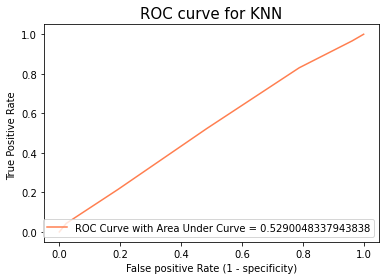

In [110]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [111]:
performance_metrics_with_default_parameters['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [113]:
dt_model.fit(x_train,y_train)
print('Training Accuracy : ',dt_model.score(x_train,y_train))

Training Accuracy :  1.0


In [114]:
y_pred=dt_model.predict(x_test)
print('Testing Accuracy : ',dt_model.score(x_test,y_test))

Testing Accuracy :  0.5254065040650406


In [115]:
confusion_matrix(y_test,y_pred)

array([[256, 221],
       [246, 261]], dtype=int64)

In [116]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       477
           1       0.54      0.51      0.53       507

    accuracy                           0.53       984
   macro avg       0.53      0.53      0.53       984
weighted avg       0.53      0.53      0.53       984


Accuracy is :  0.5254065040650406
Precission :  0.5414937759336099
Recall :  0.514792899408284
f1-score :  0.5278058645096055
Roc Auc score :  0.5257402652177688


In [117]:
y_pred_proba = dt_model.predict_proba(x_test)[:,1]

In [118]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5257402652177688


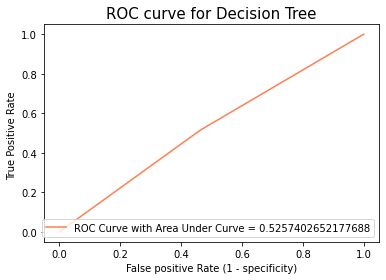

In [119]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [120]:
performance_metrics_with_default_parameters['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [122]:
rf_model.fit(x_train,y_train)
print('Training Accuracy : ',rf_model.score(x_train,y_train))

Training Accuracy :  1.0


In [123]:
y_pred=rf_model.predict(x_test)
print('Testing Accuracy : ',rf_model.score(x_test,y_test))

Testing Accuracy :  0.5752032520325203


In [124]:
confusion_matrix(y_test,y_pred)

array([[299, 178],
       [240, 267]], dtype=int64)

In [125]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59       477
           1       0.60      0.53      0.56       507

    accuracy                           0.58       984
   macro avg       0.58      0.58      0.57       984
weighted avg       0.58      0.58      0.57       984


Accuracy is :  0.5752032520325203
Precission :  0.6
Recall :  0.5266272189349113
f1-score :  0.5609243697478993
Roc Auc score :  0.5767308002431369


In [126]:
y_pred_proba = rf_model.predict_proba(x_test)[:,1]

In [127]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5829498137190444


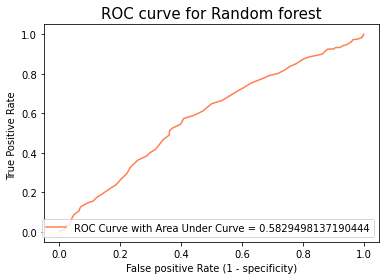

In [128]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [129]:
performance_metrics_with_default_parameters['Random Forest']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Adaboosting

In [130]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()

In [131]:
adaboost.fit(x_train,y_train)
print('Training Accuracy : ',adaboost.score(x_train,y_train))

Training Accuracy :  0.6093035078800203


In [132]:
y_pred=adaboost.predict(x_test)
print('Testing Accuracy : ',adaboost.score(x_test,y_test))

Testing Accuracy :  0.568089430894309


In [133]:
confusion_matrix(y_test,y_pred)

array([[299, 178],
       [247, 260]], dtype=int64)

In [134]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.63      0.58       477
           1       0.59      0.51      0.55       507

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.568089430894309
Precission :  0.593607305936073
Recall :  0.5128205128205128
f1-score :  0.5502645502645503
Roc Auc score :  0.5698274471859377


In [135]:
y_pred_proba = adaboost.predict_proba(x_test)[:,1]

In [136]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5876285462642502


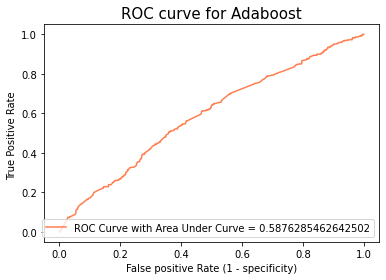

In [137]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboost',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [138]:
performance_metrics_with_default_parameters['Adaboosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()

In [140]:
gb_model.fit(x_train,y_train)
print('Training Accuracy : ',gb_model.score(x_train,y_train))

Training Accuracy :  0.6629384850025419


In [141]:
y_pred=gb_model.predict(x_test)
print('Testing Accuracy : ',gb_model.score(x_test,y_test))

Testing Accuracy :  0.584349593495935


In [142]:
confusion_matrix(y_test,y_pred)

array([[324, 153],
       [256, 251]], dtype=int64)

In [143]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.68      0.61       477
           1       0.62      0.50      0.55       507

    accuracy                           0.58       984
   macro avg       0.59      0.59      0.58       984
weighted avg       0.59      0.58      0.58       984


Accuracy is :  0.584349593495935
Precission :  0.6212871287128713
Recall :  0.49506903353057197
f1-score :  0.5510428100987925
Roc Auc score :  0.5871571582747199


In [144]:
y_pred_proba = gb_model.predict_proba(x_test)[:,1]

In [145]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6142061454107898


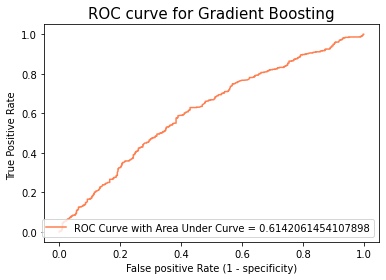

In [146]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient Boosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [147]:
performance_metrics_with_default_parameters['Gradient Boosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Comparing performance of all models

In [148]:
performance_metrics_with_default_parameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Adaboosting,Gradient Boosting
Accuracy Score,0.566057,0.577236,0.519309,0.525407,0.575203,0.568089,0.584350
Precision,0.588889,0.593814,0.534274,0.541494,0.600000,0.593607,0.621287
Recall,0.522682,0.568047,0.522682,0.514793,0.526627,0.512821,0.495069
F1 Score,0.553814,0.580645,0.528415,0.527806,0.560924,0.550265,0.551043
AUC,0.609319,0.606904,0.529005,0.525740,0.582950,0.587629,0.614206
